In [46]:
import bc_gh
import mod
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt 

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [47]:
M1 = 4
M2 = 64
K1 = int(np.log2(M1))
K2 = int(np.log2(M2))

M = M1*M2
K = int(np.log2(M))

SNR1_dB = 5
SNR2_dB = 15

SNR1 = 10**(.1*SNR1_dB)
SNR2 = 10**(.1*SNR2_dB)

In [48]:
symbols_CL, labels_CL = mod.grayQAM(M1, True)
symbols_EL_QAM, labels_EL_QAM = mod.grayQAM(M2, True)
symbols_EL_APSK, labels_EL_APSK = mod.grayAPSK(np.array([16]*4), True)

In [49]:
alpha_vec = np.arange(0, 1.05, 0.05)

Rbc_QAM_type1 = np.zeros(len(alpha_vec))
Ruc_QAM_type1 = np.zeros(len(alpha_vec))
Rbc_APSK_type1 = np.zeros(len(alpha_vec))
Ruc_APSK_type1 = np.zeros(len(alpha_vec))

Rbc_QAM_type2 = np.zeros(len(alpha_vec))
Ruc_QAM_type2 = np.zeros(len(alpha_vec))
Rbc_APSK_type2 = np.zeros(len(alpha_vec))
Ruc_APSK_type2 = np.zeros(len(alpha_vec))

In [50]:
MUSTtype = 1
for i in tqdm(range(len(alpha_vec))):
    
    alpha = alpha_vec[i]
    symbols_QAM, labels_QAM = mod.MUST(symbols_CL, symbols_EL_QAM, labels_CL, labels_EL_QAM, 1-alpha, alpha, MUSTtype)
    symbols_APSK, labels_APSK = mod.MUST(symbols_CL, symbols_EL_APSK, labels_CL, labels_EL_APSK, 1-alpha, alpha, MUSTtype)

    tmp1_QAM = bc_gh.awgn(symbols_QAM*np.sqrt(SNR1), labels_QAM, K1)
    tmp1_APSK = bc_gh.awgn(symbols_APSK*np.sqrt(SNR1), labels_APSK, K1)

    Rbc_QAM_type1[i] = tmp1_QAM.sum()
    Rbc_APSK_type1[i] = tmp1_APSK.sum()
    
    tmp2_QAM = bc_gh.awgn(symbols_QAM*np.sqrt(SNR2), labels_QAM, -K2)
    tmp2_APSK = bc_gh.awgn(symbols_APSK*np.sqrt(SNR2), labels_APSK, -K2)
    Ruc_QAM_type1[i] = tmp2_QAM.sum()
    Ruc_APSK_type1[i] = tmp2_APSK.sum()

100%|██████████| 21/21 [00:04<00:00,  4.32it/s]


In [51]:
MUSTtype = 2
for i in tqdm(range(len(alpha_vec))):
    
    alpha = alpha_vec[i]
    symbols_QAM, labels_QAM = mod.MUST(symbols_CL, symbols_EL_QAM, labels_CL, labels_EL_QAM, 1-alpha, alpha, MUSTtype)
    symbols_APSK, labels_APSK = mod.MUST(symbols_CL, symbols_EL_APSK, labels_CL, labels_EL_APSK, 1-alpha, alpha, MUSTtype)

    tmp1_QAM = bc_gh.awgn(symbols_QAM*np.sqrt(SNR1), labels_QAM, K1)
    tmp1_APSK = bc_gh.awgn(symbols_APSK*np.sqrt(SNR1), labels_APSK, K1)

    Rbc_QAM_type2[i] = tmp1_QAM.sum()
    Rbc_APSK_type2[i] = tmp1_APSK.sum()
    
    tmp2_QAM = bc_gh.awgn(symbols_QAM*np.sqrt(SNR2), labels_QAM, -K2)
    tmp2_APSK = bc_gh.awgn(symbols_APSK*np.sqrt(SNR2), labels_APSK, -K2)
    Ruc_QAM_type2[i] = tmp2_QAM.sum()
    Ruc_APSK_type2[i] = tmp2_APSK.sum()

100%|██████████| 21/21 [00:04<00:00,  4.47it/s]


In [52]:
symbols_QAM, labels_QAM = mod.grayQAM(M)
symbols_APSK, labels_APSK = mod.grayAPSK(np.array([32]*8))

tmp1 = bc_gh.awgn(symbols_QAM*np.sqrt(SNR1), labels_QAM, K1)
tmp2 = bc_gh.awgn(symbols_QAM*np.sqrt(SNR2), labels_QAM, -K2)
Rbc_QAM = tmp1.sum()
Ruc_QAM = tmp2.sum()

tmp1 = bc_gh.awgn(symbols_APSK*np.sqrt(SNR1), labels_APSK, K1)
tmp2 = bc_gh.awgn(symbols_APSK*np.sqrt(SNR2), labels_APSK, -K2)
Rbc_APSK = tmp1.sum()
Ruc_APSK = tmp2.sum()

In [62]:
print(Rbc_QAM, Ruc_QAM)
print(Rbc_APSK, Ruc_APSK)

1.1682111620903015 2.822187602519989
1.0182779431343079 3.146583318710327


P1 =  0.6553699021012402
P2 =  0.3446300978987599
P1+P2= 1.0000000000000002


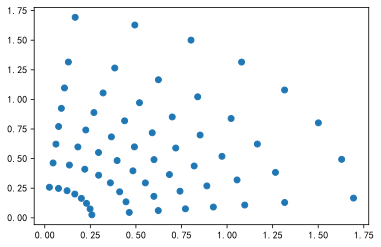

In [65]:
tmp1 = symbols_APSK[symbols_APSK.real>0]
tmp2 = tmp1[tmp1.imag>0]
plt.scatter(tmp2.real, tmp2.imag)
P1 = abs(tmp2.mean())**2
P2 = tmp2.var()
print("P1 = ", P1)
print("P2 = ", P2)
print("P1+P2=", P1+P2)
APSK_1quad = tmp2
APSK_1quad = mod.normalizeConste(APSK_1quad)

In [67]:
APSK_1quad.mean()

(0.5724377267883558+0.5724377267883556j)

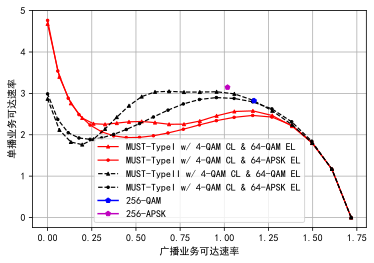

In [53]:
fig = plt.figure()
#解决中文显示问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False 
plt.grid()

plt.plot(Rbc_QAM_type1, Ruc_QAM_type1, linewidth=1.2, marker='^', markersize=3, linestyle='-', color='r')
plt.plot(Rbc_APSK_type1, Ruc_APSK_type1, linewidth=1.2, marker='.', markersize=5, linestyle='-', color='r')

plt.plot(Rbc_QAM_type2, Ruc_QAM_type2, linewidth=1.2, marker='^', markersize=3, linestyle='--', color='k')
plt.plot(Rbc_APSK_type2, Ruc_APSK_type2, linewidth=1.2, marker='.', markersize=5, linestyle='--', color='k')

plt.plot(Rbc_QAM, Ruc_QAM, marker='p', markersize=5, color='b')
plt.plot(Rbc_APSK, Ruc_APSK, marker='p', markersize=5, color='m')
plt.xlabel("广播业务可达速率")
plt.ylabel("单播业务可达速率")

plt.legend(["MUST-TypeI w/ 4-QAM CL & 64-QAM EL", "MUST-TypeI w/ 4-QAM CL & 64-APSK EL", "MUST-TypeII w/ 4-QAM CL & 64-QAM EL", "MUST-TypeI w/ 4-QAM CL & 64-APSK EL", "256-QAM", "256-APSK"])